In [2]:
import pandas as pd
import seaborn as sns 
import numpy as np
import matplotlib.pyplot as plt

In [3]:
Data = pd.read_csv(r"C:\Users\USER\Downloads\Rotten Tomatoes Movies.csv")

In [4]:
Data.head(5)

,movie_title,movie_info,critics_consensus,rating,genre,directors,writers,cast,in_theaters_date,on_streaming_date,runtime_in_minutes,studio_name,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating,audience_count
0,Percy Jackson & the Olympians: The Lightning T...,A teenager discovers he's the descendant of a ...,Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,Craig Titley,"Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,2010-06-29,83.0,20th Century Fox,Rotten,49,144,53.0,254287.0
1,Please Give,Kate has a lot on her mind. There's the ethics...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,2010-10-19,90.0,Sony Pictures Classics,Certified Fresh,86,140,64.0,11567.0
2,10,Blake Edwards' 10 stars Dudley Moore as George...,NaN,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",1979-10-05,1997-08-27,118.0,Waner Bros.,Fresh,68,22,53.0,14670.0
3,12 Angry Men (Twelve Angry Men),"A Puerto Rican youth is on trial for murder, a...",Sidney Lumet's feature debut is a superbly wri...,NR,"Classics, Drama",Sidney Lumet,Reginald Rose,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",1957-04-13,2001-03-06,95.0,Criterion Collection,Certified Fresh,100,51,97.0,105000.0
4,"20,000 Leagues Under The Sea","This 1954 Disney version of Jules Verne's 20,0...","One of Disney's finest live-action adventures,...",G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,Earl Felton,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",1954-01-01,2003-05-20,127.0,Disney,Fresh,89,27,74.0,68860.0


In [5]:
Data.shape

(16638, 17)

In [6]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16638 entries, 0 to 16637
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   movie_title         16638 non-null  object 
 1   movie_info          16614 non-null  object 
 2   critics_consensus   8309 non-null   object 
 3   rating              16638 non-null  object 
 4   genre               16621 non-null  object 
 5   directors           16524 non-null  object 
 6   writers             15289 non-null  object 
 7   cast                16354 non-null  object 
 8   in_theaters_date    15823 non-null  object 
 9   on_streaming_date   16636 non-null  object 
 10  runtime_in_minutes  16483 non-null  float64
 11  studio_name         16222 non-null  object 
 12  tomatometer_status  16638 non-null  object 
 13  tomatometer_rating  16638 non-null  int64  
 14  tomatometer_count   16638 non-null  int64  
 15  audience_rating     16386 non-null  float64
 16  audi

In [7]:
Data.describe()

,runtime_in_minutes,tomatometer_rating,tomatometer_count,audience_rating,audience_count
count,16483.000000,16638.000000,16638.000000,16386.000000,1.638600e+04
mean,102.391494,60.466522,56.607104,60.470829,1.524797e+05
std,25.028011,28.587230,66.383800,20.462368,1.817736e+06
min,1.000000,0.000000,5.000000,0.000000,5.000000e+00
25%,90.000000,38.000000,12.000000,45.000000,8.642500e+02
50%,99.000000,66.000000,28.000000,62.000000,4.876500e+03
75%,111.000000,86.000000,76.000000,77.000000,2.875200e+04
max,2000.000000,100.000000,497.000000,100.000000,3.579764e+07


In [8]:
Data.dtypes

movie_title            object
movie_info             object
critics_consensus      object
rating                 object
genre                  object
directors              object
writers                object
cast                   object
in_theaters_date       object
on_streaming_date      object
runtime_in_minutes    float64
studio_name            object
tomatometer_status     object
tomatometer_rating      int64
tomatometer_count       int64
audience_rating       float64
audience_count        float64
dtype: object

In [9]:
Data = Data.drop_duplicates()

In [10]:
Data.isnull().sum()

movie_title              0
movie_info              24
critics_consensus     8328
rating                   0
genre                   17
directors              114
writers               1349
cast                   284
in_theaters_date       815
on_streaming_date        2
runtime_in_minutes     155
studio_name            415
tomatometer_status       0
tomatometer_rating       0
tomatometer_count        0
audience_rating        252
audience_count         252
dtype: int64

In [11]:
# Drop irrelevant column

Data = Data.drop(columns=[
    'movie_info',
    'critics_consensus',
    'writers',
    'cast',
    'on_streaming_date',
    'studio_name',
    'tomatometer_status'
])

In [12]:
Data.shape

(16637, 10)

In [13]:
# Fill in the missing numeric values with the mean and median

Data['runtime_in_minutes'].fillna(Data['runtime_in_minutes'].median(), inplace=True)
Data['audience_rating'].fillna(Data['audience_rating'].mean(), inplace=True)
Data['audience_count'].fillna(0, inplace=True)
Data['in_theaters_date'].fillna('unknown', inplace=True)

# Filling missing text with unknown

Data['directors'].fillna('unknown', inplace=True)
Data['genre'].fillna('unknown', inplace=True)


C:\Users\USER\AppData\Local\Temp\ipykernel_11040\930082922.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Data['runtime_in_minutes'].fillna(Data['runtime_in_minutes'].median(), inplace=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_11040\930082922.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values al

In [14]:
Data.isnull().sum()

movie_title           0
rating                0
genre                 0
directors             0
in_theaters_date      0
runtime_in_minutes    0
tomatometer_rating    0
tomatometer_count     0
audience_rating       0
audience_count        0
dtype: int64

In [15]:
# Calculate summary statistics

Data['audience_rating'] = pd.to_numeric(Data['audience_rating'], errors ='coerce')

mean_rating = Data['audience_rating'].mean()
median_rating = Data['audience_rating'].median()
mode_rating = Data['audience_rating'].mode()

print(f'Mean Rating: {mean_rating:.2f}')
print(f'Median Rating: {median_rating}')
print(f'Mode Rating: {mode_rating}')

Mean Rating: 60.47
Median Rating: 62.0
Mode Rating: 0    72.0
Name: audience_rating, dtype: float64


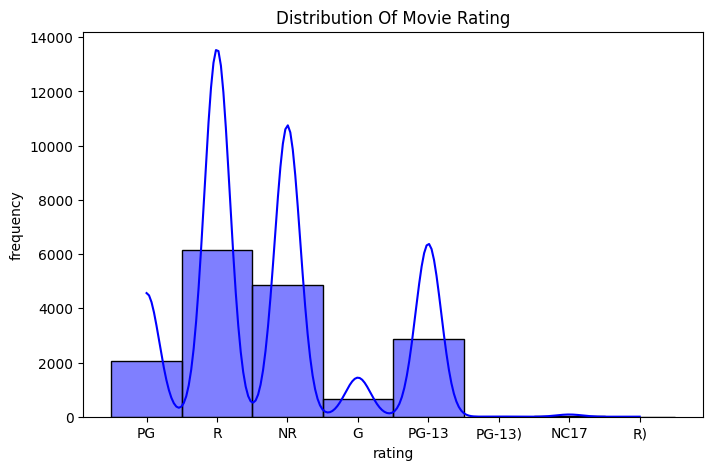

In [16]:
plt.figure(figsize=(8, 5))
sns.histplot(Data['rating'], bins=10, kde=True, color='blue')
plt.title('Distribution Of Movie Rating')
plt.xlabel('rating')
plt.ylabel('frequency')
plt.show()

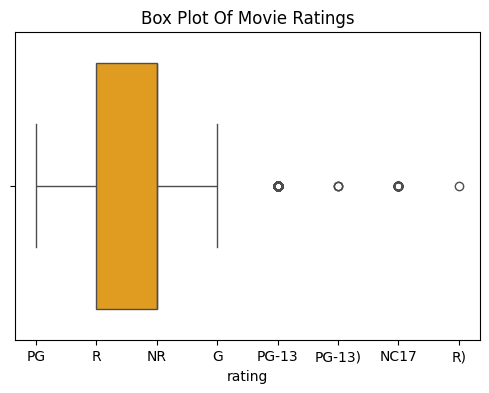

In [17]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=Data['rating'], color='orange')
plt.title('Box Plot Of Movie Ratings')
plt.show()

In [22]:
# Identify top rated movies

top_movies = Data.sort_values(by=['rating'], ascending=False).head(5)

print('Top 10 Movies:')
print(top_movies[['movie_title', 'genre', 'rating']])

Top 10 Movies:
            movie_title                                              genre  \
11170          Piercing                                 Mystery & Suspense   
8318            Junebug           Art House & International, Comedy, Drama   
5746               Eros          Art House & International, Drama, Romance   
5763         Essex Boys  Action & Adventure, Art House & International,...   
12693  Small Town Crime                          Drama, Mystery & Suspense   

      rating  
11170     R)  
8318       R  
5746       R  
5763       R  
12693      R  


C:\Users\USER\AppData\Local\Temp\ipykernel_11040\1558819475.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_avg_rating.index, y=genre_avg_rating.values, palette='viridis')


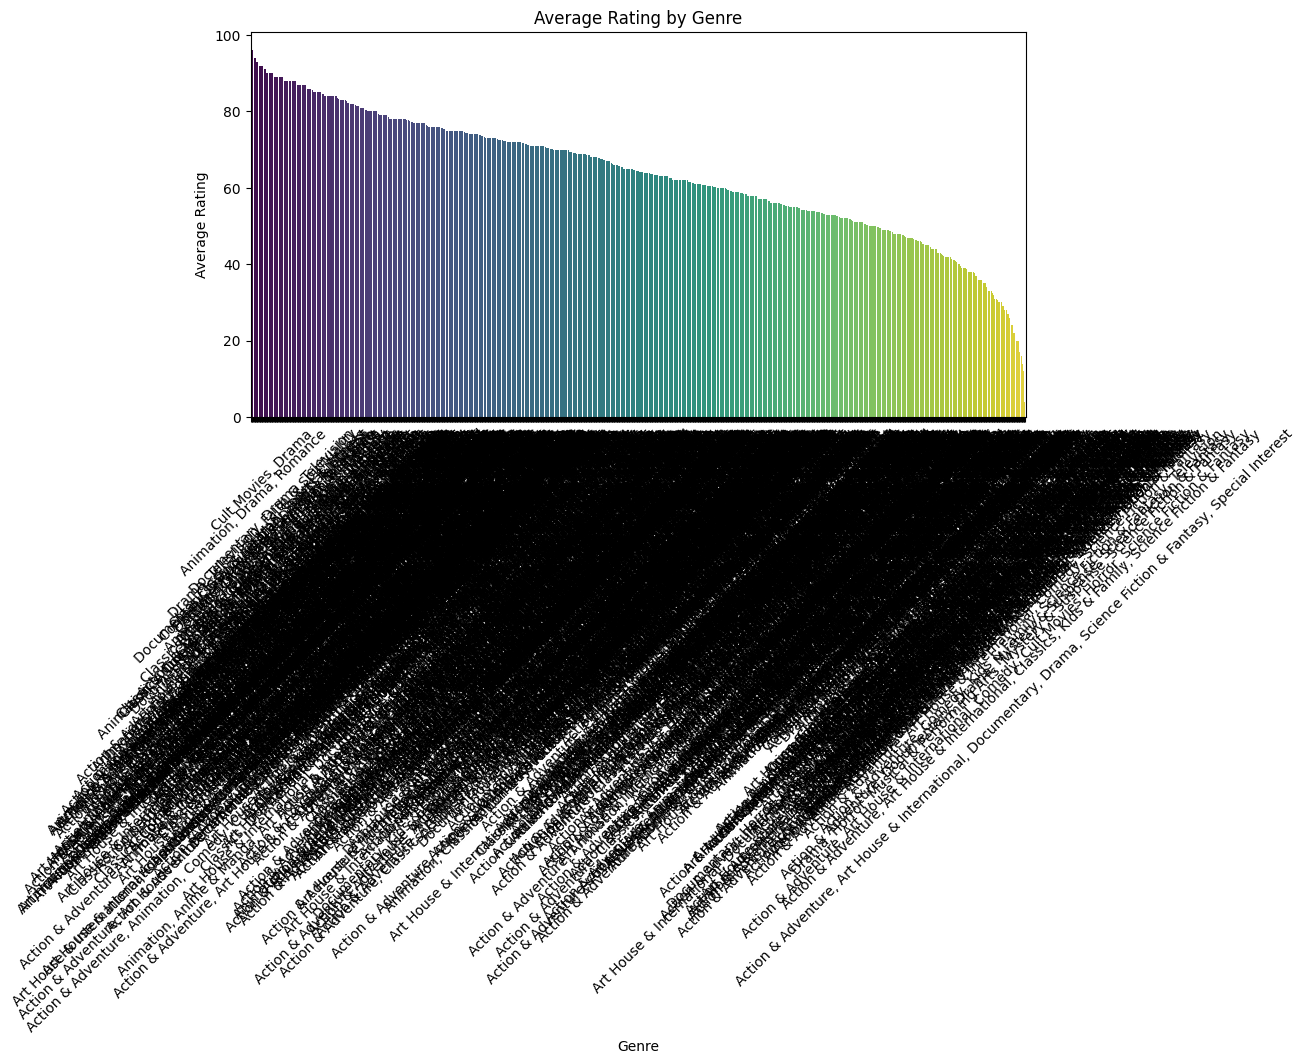

In [34]:
## Idendity Top Genres

## Ensure its Numeric
Data['audience_rating'] = pd.to_numeric(Data['audience_rating'], errors ='coerce')

# Average rating by genre
genre_avg_rating = Data.groupby('genre')['audience_rating'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x=genre_avg_rating.index, y=genre_avg_rating.values, palette='viridis')
plt.xticks(rotation=45)
plt.title('Average Rating by Genre')
plt.ylabel('Average Rating')
plt.xlabel('Genre')
plt.show()

In [35]:
Data.to_csv('cleaned_movies.csv', index=False)